In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = "C:/Users/CLINTON/Documents/My documents/LLM/Informatics/INFX 598/titanic.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
#Checking for Duplicated Rows
dupRows = df.duplicated().sum()
print("there are " + str(dupRows) + " duplicated rows in the dataframe.")

there are 0 duplicated rows in the dataframe.


In [8]:
#checking for Missing values
missing_values = df.isnull()
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")    

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [9]:
mean_age = df["Age"].mean()
mean_age = round(mean_age)
mean_age

30

In [10]:
#Replacing missing values in the age column with mean_age
df['Age'].replace(np.nan, mean_age, inplace=True)

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


The column Cabin seems to contain so many missing values and Passenger ID has a negligible correlation with Survived, so we can drop both columns

In [12]:
df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)

In [13]:
#Dropping to 2 missing rows in the Embarked column
df.dropna(subset = ['Embarked'], axis = 0, inplace = True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

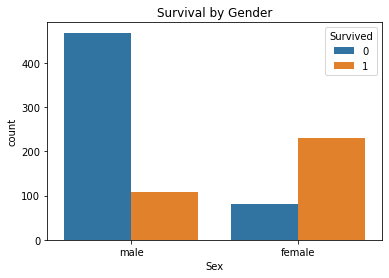

In [15]:
#Survival by Gender

sns.countplot(data= df, x = 'Sex',  hue= 'Survived')
plt.title('Survival by Gender');

Text(0.5, 1.0, 'Survival by Age')

<Figure size 576x432 with 0 Axes>

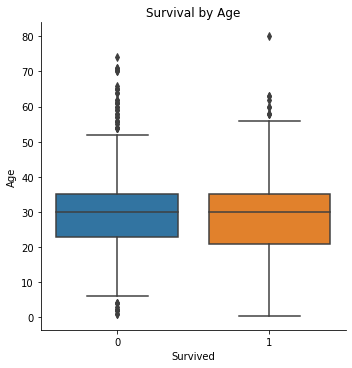

In [16]:
plt.figure(figsize=(8,6))
sns.catplot(data=df, x="Survived", y="Age", kind="box")
plt.title('Survival by Age')

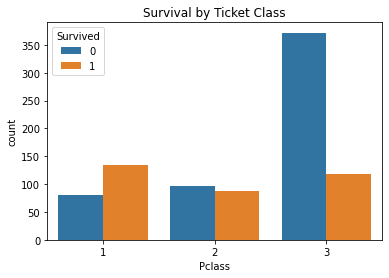

In [17]:
#Survived by Ticket Class
sns.countplot(data= df, x = 'Pclass',  hue= 'Survived')
plt.title('Survival by Ticket Class');

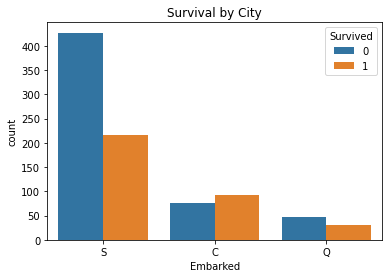

In [18]:
#Survived by City
sns.countplot(data= df, x = 'Embarked',  hue= 'Survived')
plt.title('Survival by City');

In [19]:
count = df['Embarked'].value_counts().reset_index()
count

,index,Embarked
0,S,644
1,C,168
2,Q,77


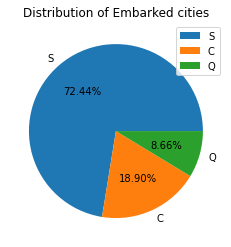

In [20]:
plt.pie(count['Embarked'], labels = count['index'],autopct='%1.2f%%')
plt.legend()
plt.title("Distribution of Embarked cities")
plt.show()

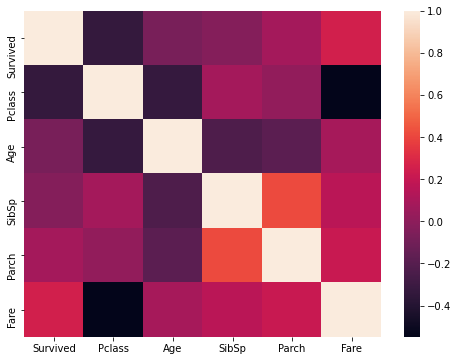

In [21]:
#Checking Correlation
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(df.corr())

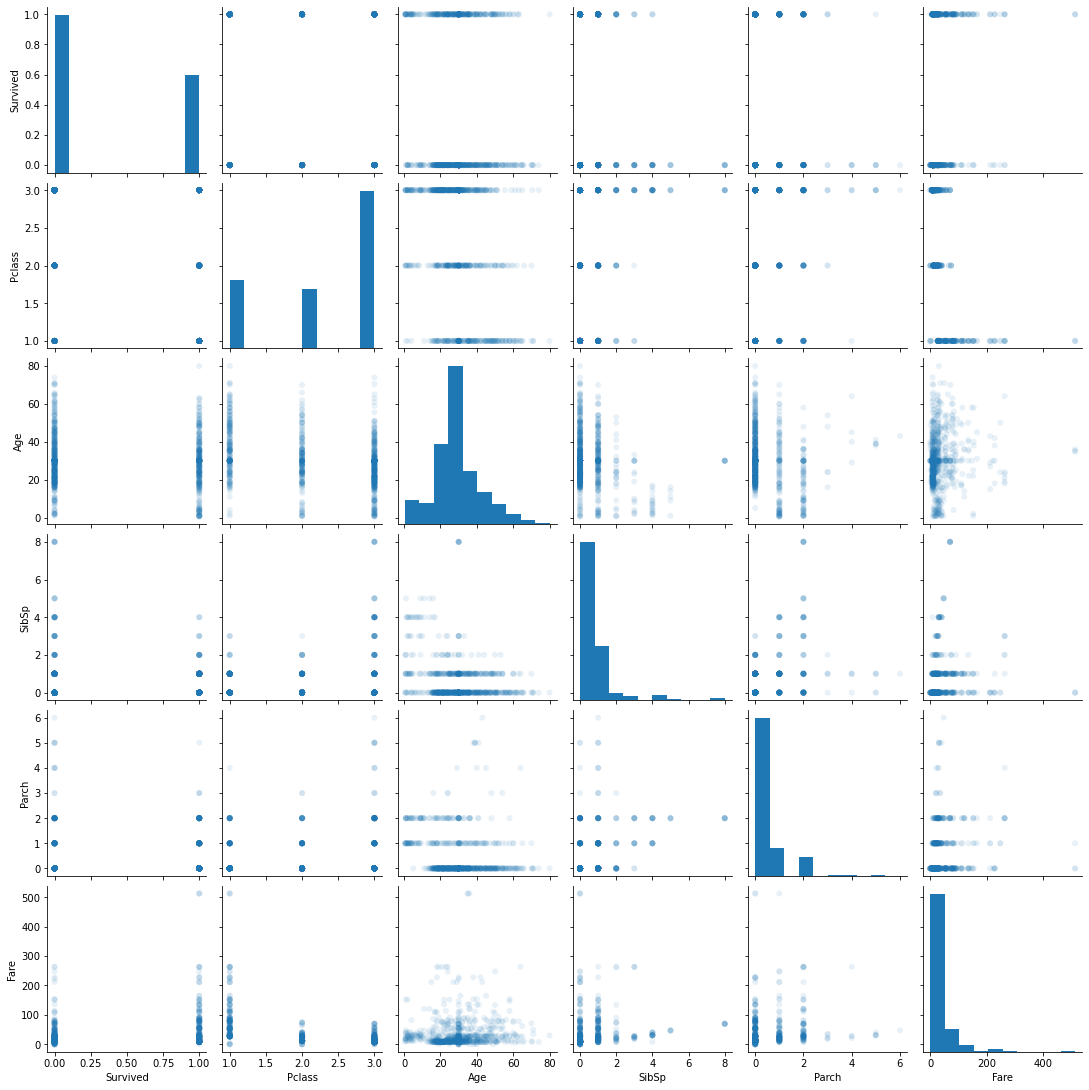

In [22]:
#Pairplot for exploration
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [23]:
train = df.copy()

In [24]:
#Declaring Variables
y_train = train["Survived"]
x_train = train.drop(columns='Survived')

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [26]:
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("cat_encoder", OneHotEncoder(sparse=False))])

In [27]:
num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Embarked', 'Sex']

In [28]:
from sklearn.compose import ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [29]:
X_train = preprocess_pipeline.fit_transform(x_train[num_attribs + cat_attribs])
X_train

array([[ 0.82520863, -0.59508164,  0.43135024, ...,  1.        ,
         0.        ,  1.        ],
       [-1.57221121,  0.63931116,  0.43135024, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82520863, -0.28648344, -0.47519908, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82520863,  0.02211476,  0.43135024, ...,  1.        ,
         1.        ,  0.        ],
       [-1.57221121, -0.28648344, -0.47519908, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82520863,  0.17641386, -0.47519908, ...,  0.        ,
         0.        ,  1.        ]])

In [30]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
y_pred = lr.predict(x_test)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [33]:
# The error on the training and test data sets
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.800281,0.775281
precision,0.752941,0.683544
recall,0.708487,0.782609
f1,0.730038,0.729730


In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(x_train, y_train)

In [35]:
y_train_dec = dt.predict(x_train)
y_test_dec = dt.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.800281,0.775281
precision,0.752941,0.683544
recall,0.708487,0.782609
f1,0.730038,0.729730


In [36]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': ['auto', 'sqrt', 'log2', None]}

GR = GridSearchCV(DecisionTreeClassifier(random_state=1),
                  param_grid = param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)

In [37]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(15, 3)

In [38]:
Y_train_pred_gr = GR.predict(x_train)
Y_test_pred_gr = GR.predict(x_test)
train_test_full_error = pd.concat([measure_error(y_train, Y_train_pred_gr, 'train'),
                              measure_error(y_test, Y_test_pred_gr, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.822785,0.820225
precision,0.816594,0.760563
recall,0.690037,0.782609
f1,0.748000,0.771429


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=1)
rf = rf.fit(x_train, y_train)

In [54]:

y_test_pred = rf.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.775281
precision,0.693333
recall,0.753623
f1,0.722222


In [42]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
# The grid search object
GV_GBC = GridSearchCV(RandomForestClassifier(random_state=1), 
                      param_grid= hyperparameter_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(x_train, y_train)

In [43]:
GV_GBC.best_estimator_

RandomForestClassifier(min_samples_split=7, random_state=1)

In [53]:

Y_test_pred_GV_GBC =GV_GBC.predict(x_test)
train_test_full_error = pd.concat([measure_error(y_test, Y_test_pred_GV_GBC, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.803371
precision,0.757576
recall,0.724638
f1,0.740741


In [47]:
#Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm = svm_clf.fit(x_train, y_train)


In [50]:

y_test_pred = svm_clf.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,test
accuracy,0.820225
precision,0.760563
recall,0.782609
f1,0.771429
